In [9]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [10]:
def throw_dice_player():
    """Simulates rolling a dice with visual animation"""
    print("Rolling the dice...", end='', flush=True)
    for _ in range(10):
        val = random.randint(1, 6)
        print(f"\rRolling the dice: {val}", end='', flush=True)
        plt.pause(0.1)
    print()
    return val

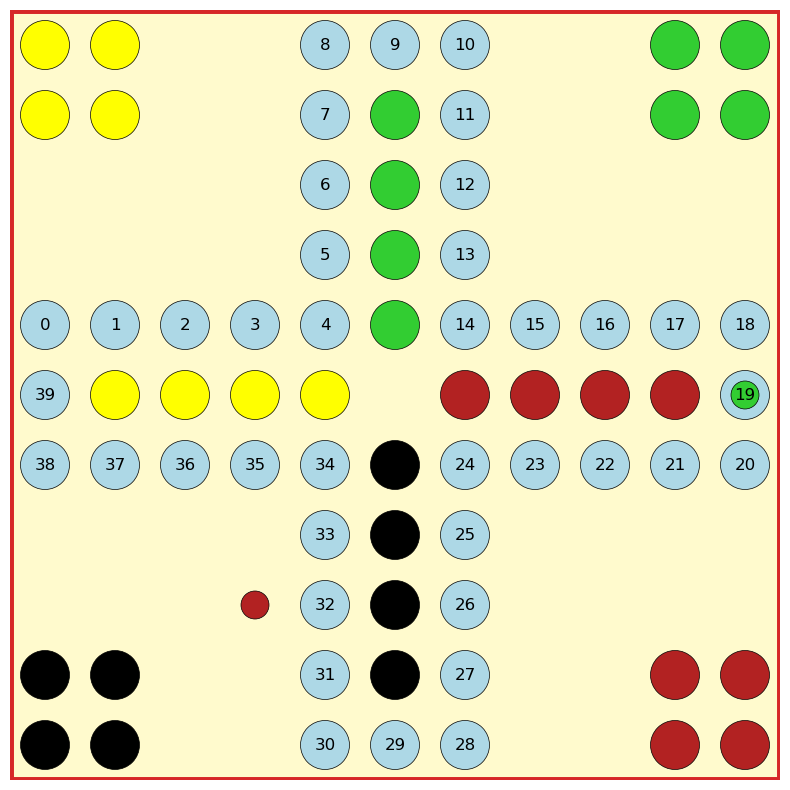

In [97]:
def board(loc):
    '''
    Moves and plots the player on the board.

    input:
    loc: dict, 0,1,2,3 for the four players (yellow=0, green=1, red=2, black=3), then (x,y) coordinates of the player on the board.
    '''

    fig, ax = plt.subplots(figsize=(10, 10))
    # Draw the main square
    square = plt.Rectangle((0, 0), 11, 11, facecolor='lemonchiffon', edgecolor='tab:red', linewidth=5)
    ax.add_patch(square)
    ax.set_xlim(0, 11)
    ax.set_ylim(0, 11)
    ax.set_aspect('equal')
    ax.axis('off')

    home_yellow = [(0.5, 10.5), (0.5, 9.5), (1.5, 10.5), (1.5, 9.5)]
    home_green = [(9.5, 9.5), (9.5, 10.5), (10.5, 9.5), (10.5, 10.5)]
    home_black = [(0.5, 0.5), (0.5, 1.5), (1.5, 0.5), (1.5, 1.5)]
    home_red = [(9.5, 0.5), (9.5, 1.5), (10.5, 0.5), (10.5, 1.5)]
 
    
    # Draw circles in corners
    for i, (x, y) in enumerate(home_yellow):
        circle = plt.Circle((x, y), 0.35, facecolor='yellow', fill=True, edgecolor='black', linewidth=0.5)
        ax.add_patch(circle)
    for i, (x, y) in enumerate(home_green):
        circle = plt.Circle((x, y), 0.35, facecolor='limegreen', fill=True, edgecolor='black', linewidth=0.5)
        ax.add_patch(circle)
    for i, (x, y) in enumerate(home_black):
        circle = plt.Circle((x, y), 0.35, facecolor='black', fill=True, edgecolor='black', linewidth=0.5)
        ax.add_patch(circle)
    for i, (x, y) in enumerate(home_red):
        circle = plt.Circle((x, y), 0.35, facecolor='firebrick', fill=True, edgecolor='black', linewidth=0.5)
        ax.add_patch(circle)

    pos_dicts = {0:(0.5, 6.5), 1:(1.5, 6.5), 2:(2.5, 6.5), 3:(3.5, 6.5), 4:(4.5, 6.5), 5:(4.5, 7.5), 6:(4.5, 8.5), 7:(4.5, 9.5), 8:(4.5, 10.5), 9:(5.5, 10.5), 
    10:(6.5, 10.5), 11:(6.5, 9.5), 12:(6.5, 8.5), 13:(6.5, 7.5), 14:(6.5, 6.5), 15:(7.5, 6.5), 16:(8.5, 6.5), 
    17:(9.5, 6.5), 18:(10.5, 6.5), 19:(10.5, 5.5), 20:(10.5, 4.5), 21:(9.5, 4.5), 22:(8.5, 4.5), 23:(7.5, 4.5),
    24:(6.5, 4.5), 25:(6.5, 3.5), 26:(6.5, 2.5), 27:(6.5, 1.5), 28:(6.5, 0.5), 29:(5.5, 0.5), 30:(4.5, 0.5),
    31:(4.5, 1.5), 32:(4.5, 2.5), 33:(4.5, 3.5), 34:(4.5, 4.5), 35:(3.5, 4.5), 36:(2.5, 4.5), 37:(1.5, 4.5),
    38:(0.5, 4.5), 39:(0.5, 5.5)}

    finish_yellow = [(1.5, 5.5), (2.5, 5.5), (3.5, 5.5), (4.5, 5.5)]
    finish_green = [(5.5, 9.5), (5.5, 8.5), (5.5, 7.5), (5.5, 6.5)]
    finish_black = [(5.5, 1.5), (5.5, 2.5), (5.5, 3.5), (5.5, 4.5)]
    finish_red = [(6.5, 5.5), (7.5, 5.5), (8.5, 5.5), (9.5, 5.5)]
    

    for i in pos_dicts:
        x, y = pos_dicts[i]
        circle = plt.Circle((x, y), 0.35, facecolor='lightblue', fill=True, edgecolor='black', linewidth=0.5)
        ax.add_patch(circle)
        ax.text(x, y, str(i), fontsize=12, ha='center', va='center')
    for i, (x, y) in enumerate(finish_yellow):
        circle = plt.Circle((x, y), 0.35, facecolor='yellow', fill=True, edgecolor='black', linewidth=0.5)
        ax.add_patch(circle)
    for i, (x, y) in enumerate(finish_green):
        circle = plt.Circle((x, y), 0.35, facecolor='limegreen', fill=True, edgecolor='black', linewidth=0.5)
        ax.add_patch(circle)
    for i, (x, y) in enumerate(finish_black):
        circle = plt.Circle((x, y), 0.35, facecolor='black', fill=True, edgecolor='black', linewidth=0.5)
        ax.add_patch(circle)
    for i, (x, y) in enumerate(finish_red):
        circle = plt.Circle((x, y), 0.35, facecolor='firebrick', fill=True, edgecolor='black', linewidth=0.5)
        ax.add_patch(circle)


    for i in range(4):
        if i in loc.keys():
            x, y = loc[i]
            if i == 0:
                color = 'yellow'
            elif i == 1:
                color = 'limegreen'
            elif i == 2:
                color = 'firebrick'
            else:
                color = 'black'
            circle = plt.Circle((x, y), 0.2, facecolor=color, fill=True, edgecolor='black', linewidth=0.5)
            ax.add_patch(circle)
    
   
    plt.show()
board({1:(10.5,5.5), 2:(3.5, 2.5)})  # Initial board setup



In [11]:
def main(play):
    """Main game function"""
    if play == 'y':
        dice_value = throw_dice_player()
        print(f"You rolled a {dice_value}!")

In [46]:
# Game execution
play = 'y'  # input("Do you want to play Mens Erger Je Niet? (y/n) ")
main(play)

Rolling the dice: 6
You rolled a 6!

You rolled a 6!
